# Cleaning up wage_offer_from

wage offer from is represented in two columns wage_offer_from_9089 and wage_offered_from_9089. These both columns must be merged in order to work with them.

In [146]:
import pandas as pd
import importlib
import modules
import numpy as np

In [147]:
col_list= ["wage_offer_from_9089", "wage_offered_from_9089"]
visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_from_9089,wage_offered_from_9089
0,75629,NaN
1,37024,NaN
2,47923,NaN
3,10.97,NaN
4,100000,NaN


In [148]:
visas_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

wage_offered_from_9089 was sucessfully imported as float. 
However we'll have to take a closer look at wage_offer_from_9089 to convert it to a float value.

Next, we'll take a closer look how the values in these two columns are distributed. 
We defined a new function in our modules library to deal with this task. 

wage_offer_from_9089
259591/374362 69%
Filled: |██████████████████████████████████----------------| 69.3% Rows

wage_offered_from_9089
114647/374362 31%
Filled: |███████████████-----------------------------------| 30.6% Rows



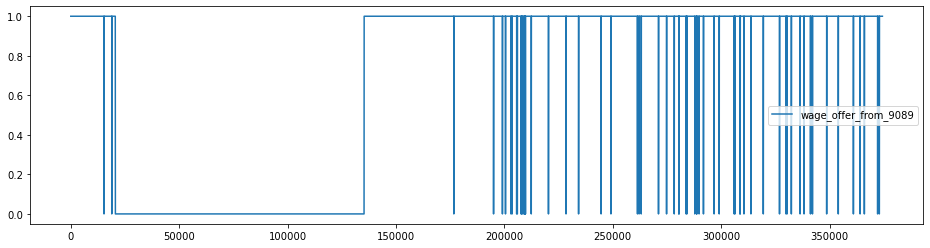

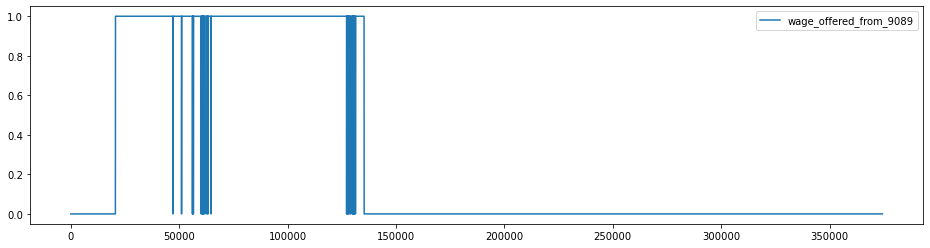

In [149]:
modules.print_count_of_values_relation(visas_df, True, True)

To explain the resulting graphs: 
The X-Axis shows the index of all values. We have over 350000 values (rows) in our dataset.
The Y-Axis shows if a row is filled with a actual value. Not NaN Values are displayed as 1, NaN values are displayed as 0. 

It becomes aparent that both columnscomplete each other. Gaps in wage_offer_from_9098 can be filled with wage_offer_from_9098.

----
## Cleaning up `wage_offer_from_9089`

In Progress of our data analysis it became apparent, that wage_offer_from_9089 has to be cleaned up, before analyzing the contained data. 

In [150]:
cleanup_df = visas_df.copy()
cleanup_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

Originally all the imported rows were recognized as "object". But the values should be converted to float values.

In [151]:
# cleanup_df["wage_offer_from_9089"].astype('float')

First, we tried to convert the data, by applying the new type.

In [152]:
cleanup_df["wage_offer_from_9089"].apply(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
374357      <class 'str'>
374358      <class 'str'>
374359      <class 'str'>
374360      <class 'str'>
374361      <class 'str'>
Name: wage_offer_from_9089, Length: 374362, dtype: object

We defined a new columnn, containing the types of all newly converted values.

In [153]:
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [154]:

cleanup_df.head()

,wage_offer_from_9089,wage_offered_from_9089,wage_Type
0,75629,NaN,float
1,37024,NaN,float
2,47923,NaN,float
3,10.97,NaN,float
4,100000,NaN,float


In [155]:
import modules

In [156]:
importlib.reload(modules)
modules.print_full(cleanup_df.sample(100))

       wage_offer_from_9089  wage_offered_from_9089 wage_Type
214139            88,254.00                     NaN       str
15135                 51125                     NaN     float
195795           103,272.00                     NaN       str
100359                  NaN                88254.00     float
53034                   NaN                84000.00     float
3867                 100000                     NaN     float
64325                   NaN               110000.16     float
353789            57,866.00                     NaN       str
129559                  NaN                50419.00     float
123167                  NaN               127566.00     float
111639                  NaN                80000.00     float
35630                   NaN                60600.00     float
117925                  NaN                68750.00     float
179600            75,442.00                     NaN       str
113160                  NaN               111100.00     float
342825  

It became apparent, that apllying the new type was partially successful. But values containing delimiters or seperators are still recognized as a string. 

In [157]:

cleanup_df['wage_Type'].value_counts()

float    258181
str      116181
Name: wage_Type, dtype: int64

We defined a new function to remove the delimiters. Additionally we replaced the '#############' values, which occured two times, with NaN. 

In [158]:
def clean_currency(x):
    """ If the value is a string, then remove delimiters
    otherwise, the value is numeric and can be converted.

    """
    if isinstance(x, str):
        if x == '#############':
            x = np.nan
        else:
            return(x.replace(',', ''))
    return(x)

In [159]:
cleanup_df["wage_offer_from_9089"] = cleanup_df["wage_offer_from_9089"].apply(clean_currency).astype('float')
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [160]:

cleanup_df['wage_Type'].value_counts()

float    374362
Name: wage_Type, dtype: int64

In [161]:

modules.print_full(cleanup_df.sample(100))

        wage_offer_from_9089  wage_offered_from_9089 wage_Type
344499              123000.0                     NaN     float
81935                    NaN                 60736.0     float
160923              112000.0                     NaN     float
122244                   NaN                131250.0     float
3038                 81931.0                     NaN     float
317906              117388.0                     NaN     float
132387                   NaN                 92926.0     float
284883               83450.0                     NaN     float
249321              113000.0                     NaN     float
14755                81682.0                     NaN     float
233570              175000.0                     NaN     float
152516              120450.0                     NaN     float
40012                    NaN                106642.0     float
367668               95100.0                     NaN     float
223794              146659.0                     NaN   

Perfect, all values are now converted to float. The column `wage_offer_from_9089` was successfully cleaned up.

In [162]:
cleanup_df['wage_offer_from_9089'].median()

91104.0

In [163]:
visas_df['wage_offer_from_9089'] = cleanup_df['wage_offer_from_9089']
del cleanup_df

In [164]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089
370251,138445.0,NaN
153739,20342.0,NaN
26649,NaN,63710.4
326211,111925.0,NaN
370185,163500.0,NaN
351116,63918.0,NaN
225763,72000.0,NaN
67685,NaN,84000.0
252220,168854.0,NaN
139130,78811.0,NaN


## Merging both columns

All NaN values wil lbe filled with 0 in order to sum both columns up.
We saw earlier thar both columns never overlap.

In [165]:
visas_df['wage_offer_merged'] = visas_df['wage_offer_from_9089'].fillna(0) + visas_df['wage_offered_from_9089'].fillna(0)

In [166]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089,wage_offer_merged
213909,161000.0,NaN,161000.0
93509,NaN,125000.0,125000.0
320233,105000.0,NaN,105000.0
192777,75962.0,NaN,75962.0
201282,105560.0,NaN,105560.0
178629,110095.0,NaN,110095.0
72235,NaN,117030.0,117030.0
147932,224536.0,NaN,224536.0
117938,NaN,150000.0,150000.0
210598,96140.0,NaN,96140.0


In [167]:
visas_df['wage_offer_merged'].dtype

dtype('float64')

In [168]:
(visas_df['wage_offer_merged'] == 0).sum()

126

We filled NaN values with 0 in Order to calculate sums. Now we will replaye 0 with NaN to keep the columns cleaned up.
Additionally a wage of 0 would be unrealistic.

In [169]:
visas_df['wage_offer_merged'].replace(0, np.nan, inplace=True)

In [170]:
(visas_df['wage_offer_merged'] == 0).sum()

0

In [171]:
visas_df['wage_offer_merged'].median()
clean_df = pd.DataFrame()
clean_df['wage_offer_merged'] = visas_df['wage_offer_merged']

In [172]:
clean_df.head()


,wage_offer_merged
0,75629.00
1,37024.00
2,47923.00
3,10.97
4,100000.00


---
# Cleaning up wage_offer_unit

In [173]:
col_list= ["wage_offer_unit_of_pay_9089", "wage_offered_unit_of_pay_9089"]
visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
0,yr,NaN
1,yr,NaN
2,yr,NaN
3,hr,NaN
4,yr,NaN


In [174]:
visas_df.sample(50)

,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
157532,Year,NaN
144458,Year,NaN
190762,Year,NaN
92787,NaN,Year
208291,Year,NaN
257374,Year,NaN
139320,Year,NaN
70831,NaN,Year
155120,Year,NaN
94975,NaN,Year


In [175]:
visas_df['wage_offer_unit_of_pay_9089'].value_counts()

Year         230591
yr            19733
Hour           7038
hr              781
Week            142
Month            81
wk               30
mth              21
Bi-Weekly        20
bi                9
Name: wage_offer_unit_of_pay_9089, dtype: int64

In [176]:
visas_df['wage_offered_unit_of_pay_9089'].value_counts()

Year         68950
Hour          1651
Week            58
Month           39
Bi-Weekly        1
Name: wage_offered_unit_of_pay_9089, dtype: int64

wage_offer_unit_of_pay_9089 has to be cleaned. We'll deal with this issue after the merge. 

wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows

wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows



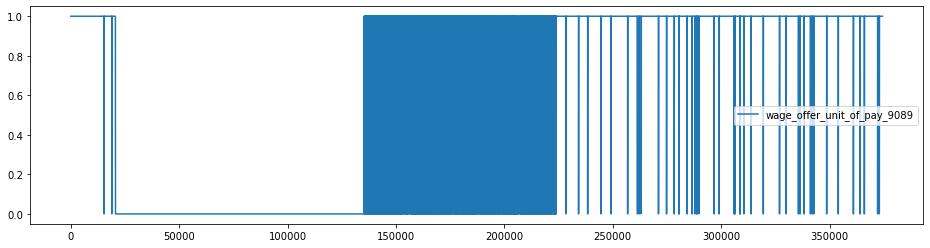

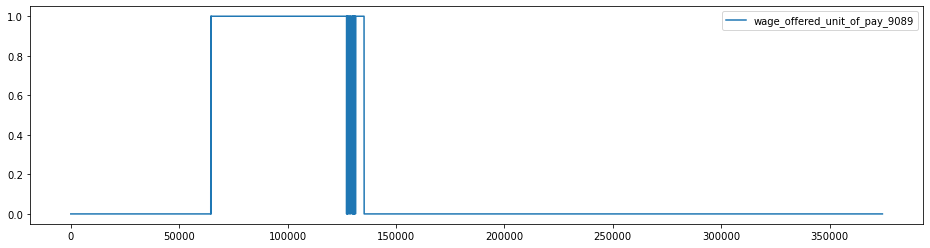

In [177]:
modules.print_count_of_values_relation(visas_df, True, True)

The dristribution of values reveals a problem. Between an index of 25.000 and 75.000 or dataset contains no value for the unit of pay.

We will merge the both columns and take a closer look at the values they are containing.

In [178]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_of_pay_9089'].fillna('') + visas_df['wage_offered_unit_of_pay_9089'].fillna('')

In [179]:
visas_df['wage_offer_unit_merged'].replace('', np.nan, inplace=True)

In [180]:
visas_df['wage_offer_unit_merged'].value_counts()

Year         299541
yr            19733
Hour           8689
hr              781
Week            200
Month           120
wk               30
mth              21
Bi-Weekly        21
bi                9
Name: wage_offer_unit_merged, dtype: int64

In [181]:
unit_abbreviations = {
  "Year": "yr",
  "Month": "mth",
  "Bi-Weekly": "bi",
  "Week": "wk",
  "Hour": "hr"
}

In [182]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_merged'].replace(unit_abbreviations)

In [183]:
visas_df['wage_offer_unit_merged'].value_counts()

yr     319274
hr       9470
wk        230
mth       141
bi         30
Name: wage_offer_unit_merged, dtype: int64

wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows

wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows

wage_offer_unit_merged
329145/374362 88%
Filled: |███████████████████████████████████████████-------| 87.9% Rows



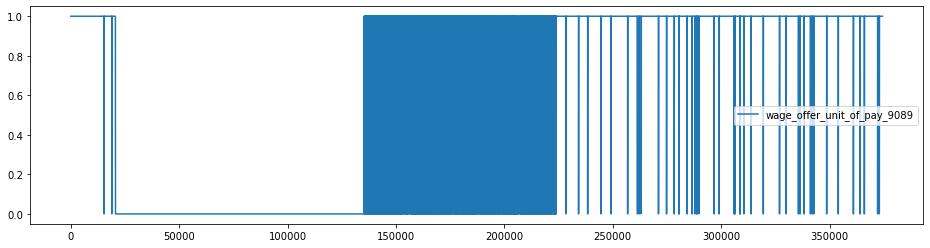

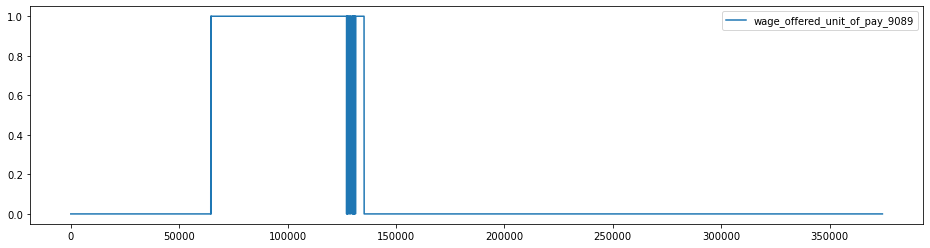

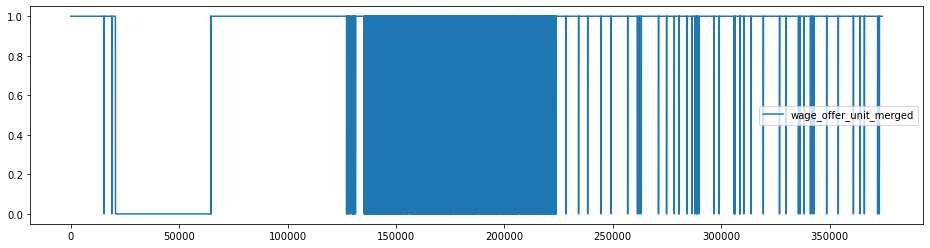

In [184]:

modules.print_count_of_values_relation(visas_df, True, True)

The gap remains, considering the gap is realtively small and we have lot's of values, we'll ignore the gap in the further analysis.


In [187]:
clean_df['wage_offer_unit'] = visas_df['wage_offer_unit_merged']

In [188]:

clean_df.head()

,wage_offer_merged,wage_offer_unit,wage_offer_unit2
0,75629.00,yr,test
1,37024.00,yr,test
2,47923.00,yr,test
3,10.97,hr,test
4,100000.00,yr,test


In [191]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().sort_values()

wage_offer_unit
hr       221.303376
bi      1634.519655
mth     9005.593357
wk     11315.946130
yr     96487.857970
Name: wage_offer_merged, dtype: float64